
<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
Digital Image Processing <br>
<font color=2565AE size=5>
Department Of Mathematical Sciences <br>
Spring 2025<br>
<font color=3C99D size=5>
Assignment 2 <br>
</div>


---



### Full Name : Nazanin Yousefi
### Student Number : 401110172
___

In [15]:
# DO NOT MODIFY THIS CELL
import numpy as np
import cv2
from matplotlib import pyplot as plt
import skimage.metrics
from scipy.fftpack import dct, idct

import os #like assignment 1 I need to import this inorder to save my ouput results

## **Q1: DFT Transformation**

**DFT transform**

In [16]:
def dft(image):
  '''
  function for applying DFT tranform.
  Hint:
    https://numpy.org/doc/stable/reference/generated/numpy.fft.fft2.html

  input(s):
    image (ndarray): input image
  output (s):
    output_image (ndarray): transformed image
  '''
  ###############################################
  ############# YOUR CODE GOES HERE #############

  output_image = output_image = np.fft.fft2(image)

  ###############################################
  return output_image

def shift_fft(dft):
  '''
  function for shifting tranformed image.
  Hint:
    https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html

  input(s):
    dft (ndarray): input trandformed image
  output (s):
    output_image (ndarray): shifted transformed image
  '''
  ###############################################
  ############# YOUR CODE GOES HERE #############

  output_image = np.fft.fftshift(dft)

  ###############################################
  return output_image

def inverse_shift(shifted_image):
  '''
  function for inverting shift DFT.
  Hint:
    https://numpy.org/doc/stable/reference/generated/numpy.fft.ifftshift.html

  input(s):
    shifted_image (ndarray): input shifted image
  output (s):
    output_image (ndarray): inverse shifted image
  '''
  ###############################################
  ############# YOUR CODE GOES HERE #############

    # output_image = np.fft.ifftshift(inversed_image)
  output_image = np.fft.ifftshift(shifted_image)

  ###############################################
  return output_image


def idft(image):
  '''
  function for applying IDFT tranform.
  Hint:
    https://numpy.org/doc/stable/reference/generated/numpy.fft.ifft2.html

  input(s):
    image (ndarray): input image
  output (s):
    output_image (ndarray): inverse transformed image
  '''
  ###############################################
  ############# YOUR CODE GOES HERE #############

  output_image = np.fft.ifft2(image)

  ###############################################
  return output_image



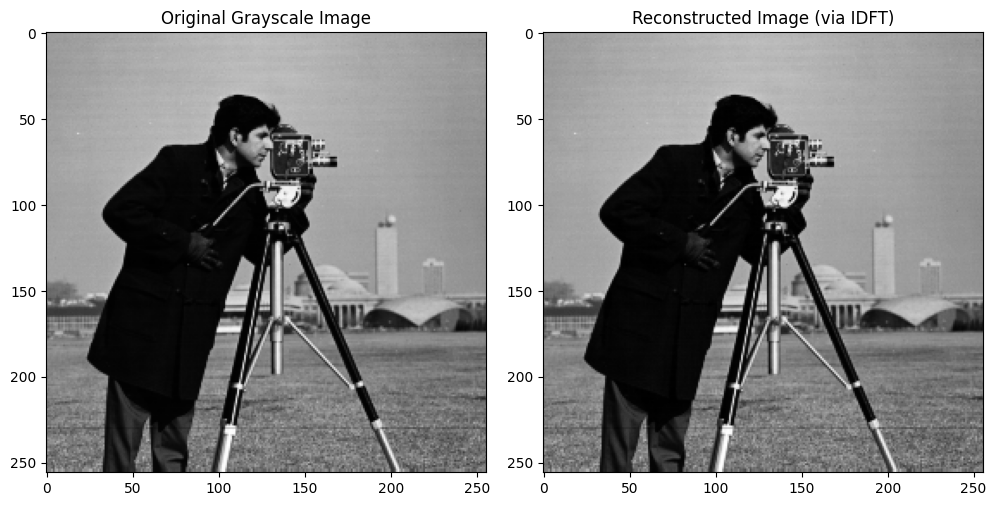

In [17]:

###############################################
############# YOUR CODE GOES HERE #############

# output_dir = 'Images/outputs/Q1'
output_dir = 'Images/outputs/Q1_DFT'
os.makedirs(output_dir, exist_ok=True)

img_original = cv2.imread('Images/original_image.png', cv2.IMREAD_GRAYSCALE) #image is not loading try loading it in grayScale later
if img_original is None:
    print("Error: Could not load original_image.png")
else:
    dft_result = dft(img_original)
    shifted_dft = shift_fft(dft_result)
    inv_shifted = inverse_shift(shifted_dft)
    reconstructed_img = idft(inv_shifted)
    # IDFT result is complex, get the real part and convert type
    reconstructed_img = np.real(reconstructed_img).astype(np.uint8)

# Compute magnitude spectrum
mag_spec = np.log(np.abs(shifted_dft))
# Normalize magnitude spectrum to [0, 255] for saving
mag_spec_normalized = cv2.normalize(mag_spec, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Save images to output folder
cv2.imwrite(os.path.join(output_dir, 'original_image.png'), img_original)
cv2.imwrite(os.path.join(output_dir, 'magnitude_spectrum.png'), mag_spec_normalized)
cv2.imwrite(os.path.join(output_dir, 'reconstructed_image.png'), reconstructed_img)

    
if img_original is not None:
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(img_original, cmap='gray')
    plt.title('Original Grayscale Image')

    # plt.subplot(1, 3, 2)
    # plt.imshow(mag_spec, cmap='gray') # Display magnitude spectrum if calculated
    # plt.title('DFT Magnitude Spectrum')

    plt.subplot(1, 3, 2) # Adjust subplot index if showing spectrum
    plt.imshow(reconstructed_img, cmap='gray')
    plt.title('Reconstructed Image (via IDFT)')

    plt.tight_layout()
    plt.show()

###############################################

**DCT transform**

In [18]:
def dct_transform(image):
  '''
  function for applying DCT tranform.
  Set:
    transposed function as an input
    type = 2
    norm = 'ortho'
  Hint:
    https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.dct.html

  input(s):
    image (ndarray): input image
  output (s):
    output_image (ndarray): transformed image
  '''
  ###############################################
  ############# YOUR CODE GOES HERE #############
    
  # DCT for rows (axis=0) and columns (axis=1)
  output_image = dct(dct(image, type=2, axis=0, norm='ortho'), type=2, axis=1, norm='ortho')

  ###############################################
  return output_image


# i think by dct here we mean dct cooefficient
def idct_transform(dct):
  '''
  function for inverting transformed image.
  Set:
    transposed function as an input
    type = 2
    norm = 'ortho'
  Hint:
    https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.idct.html

  input(s):
    dct (ndarray): input trandformed image
  output (s):
    output_image (ndarray): inverted transformed image
  '''
  ###############################################
  ############# YOUR CODE GOES HERE #############

  output_image = idct(idct(dct, type=2, axis=0, norm='ortho'), type=2, axis=1, norm='ortho')
    
  ###############################################
  return output_image

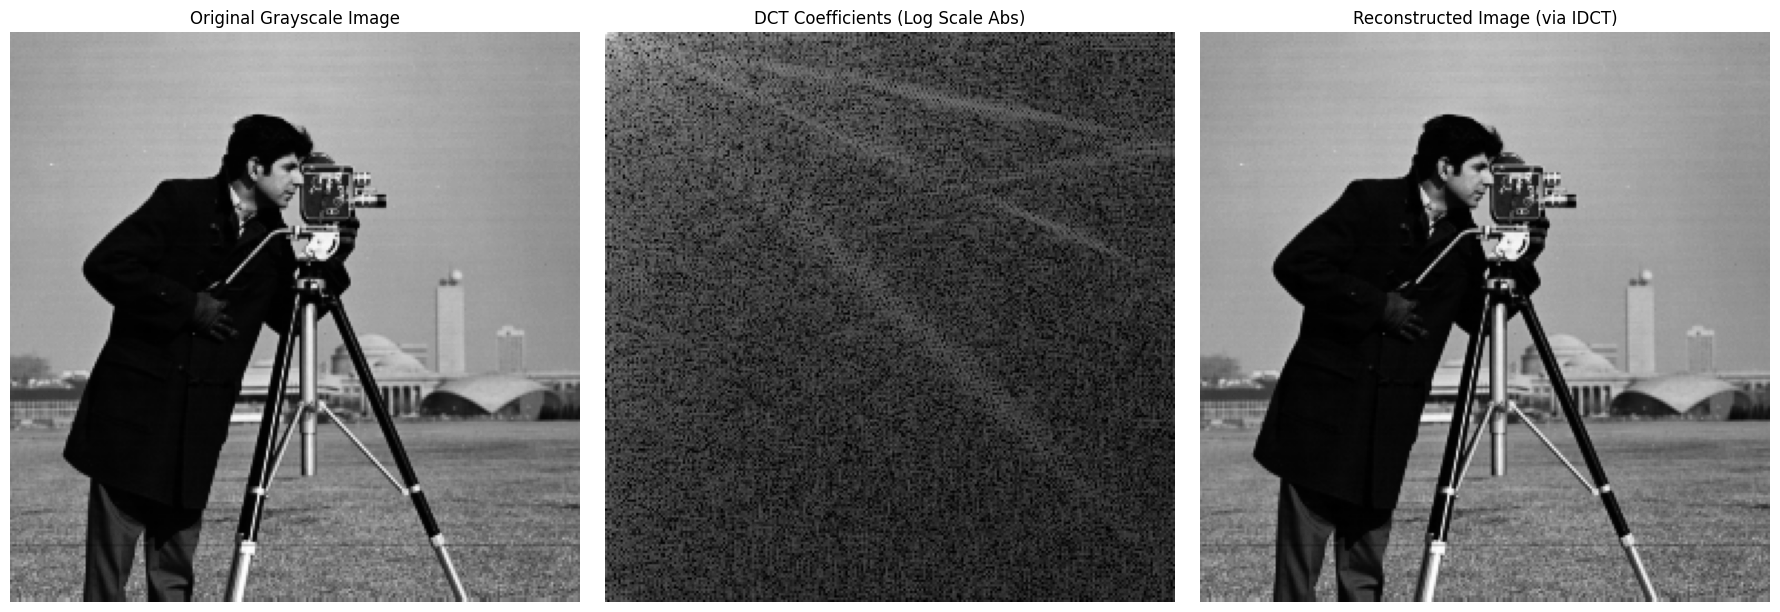

In [19]:

###############################################
############# YOUR CODE GOES HERE #############
output_dir_dct = 'Images/outputs/Q1_DCT'
os.makedirs(output_dir_dct, exist_ok=True)

img_path = 'Images/original_image.png'
img_original = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

if img_original is None:
    print(f"Error: Could not load image at {img_path}")
else:
    dct_coeffs = dct_transform(img_original)
    dct_coeffs_viz = np.log1p(np.abs(dct_coeffs))
    # Normalize the visualization to [0, 255] for saving the result
    dct_coeffs_normalized = cv2.normalize(dct_coeffs_viz, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    reconstructed_img_dct = idct_transform(dct_coeffs)
    reconstructed_img_dct = np.clip(reconstructed_img_dct, 0, 255).astype(np.uint8)

    try:
        cv2.imwrite(os.path.join(output_dir_dct, 'original_image.png'), img_original)
        cv2.imwrite(os.path.join(output_dir_dct, 'dct_coefficients_viz.png'), dct_coeffs_normalized)
        cv2.imwrite(os.path.join(output_dir_dct, 'reconstructed_image_dct.png'), reconstructed_img_dct)
    except Exception as e:
        print(f"Error saving DCT images: {e}")

    plt.figure(figsize=(18, 6)) 

    plt.subplot(1, 3, 1)
    plt.imshow(img_original, cmap='gray')
    plt.title('Original Grayscale Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(dct_coeffs_viz, cmap='gray')
    plt.title('DCT Coefficients (Log Scale Abs)')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(reconstructed_img_dct, cmap='gray')
    plt.title('Reconstructed Image (via IDCT)')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

###############################################

## **Q2: Image Cartoonization**

One of the applications of bilateral filters is for adding cartoon effects to color images. In this question we are going to implement the code to cartoonize a given image.

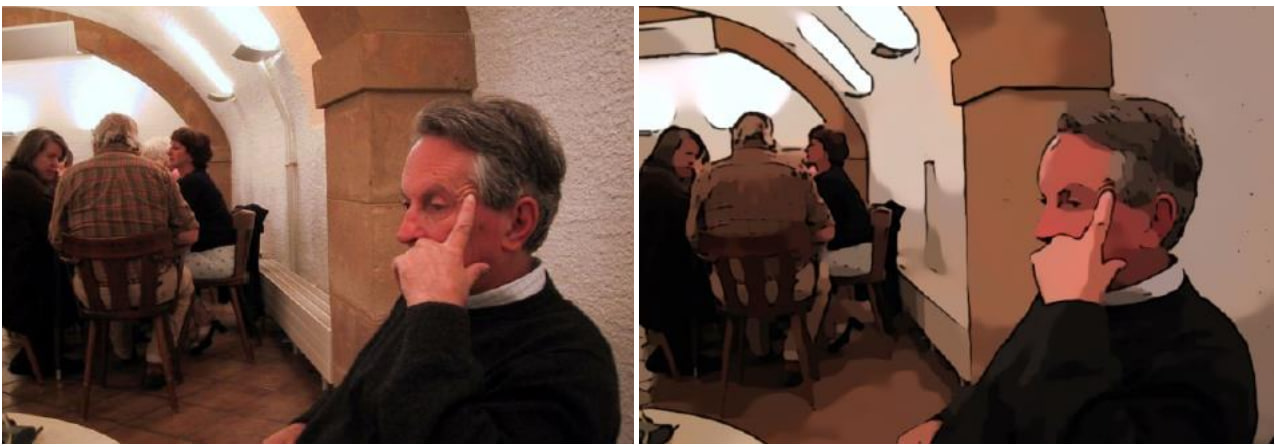

Steps for adding Cartoon effect to the given color image `img`:


1.   Blur `img` using any method you prefer to get `img_blur`.
2.   Use any edge detection method on `img_blur` to get a single channel image `img_edge`, containing the edges.
3.   Apply bilateral filter on the original image `img` to get `img_bf`.
4.   Mix `img_bf` and `img_edges` to get the desired cartoonized image.



### Step 1: Edge Detection

Implement `edge_detection` function to get a colored image as input and output a gray image indicating the edges. You are free to use any method you want or use existing functions from `opencv`.

In [110]:
def edge_detection(img : np.ndarray):
  # TODO
  # pass

  img_blur = cv2.GaussianBlur(img, (9, 9), 0) # 5x5 kernel

  gray_blur = cv2.cvtColor(img_blur, cv2.COLOR_BGR2GRAY)
  gray_blur = cv2.medianBlur(gray_blur, 5)


  # #adjust later, for now 80,160
  low_threshold = 90
  high_threshold = 120
    
  # low_threshold = 70
  # high_threshold = 140
  # low_threshold = 30
  # high_threshold = 100
  img_edge = cv2.Canny(gray_blur, low_threshold, high_threshold)

  # Dilate edges to make them thicker
  kernel = np.ones((3, 3), np.uint8)
  img_edge = cv2.dilate(img_edge, kernel, iterations=2)


  # cleaning lines
  img_edge = cv2.morphologyEx(img_edge, cv2.MORPH_CLOSE, kernel, iterations=2)
  _, img_edge = cv2.threshold(img_edge, 127, 255, cv2.THRESH_BINARY)

  return img_edge

Now, Apply the method on `Q2-input.jpg` and save the result as `Q2-output-edges.jpg`. Your score on this part depends on the quality of the result.

Q2-input.jpg loaded. Detecting edges...
Edge map saved to Images/outputs/Q2/Q2-output-edges-110-120.jpg


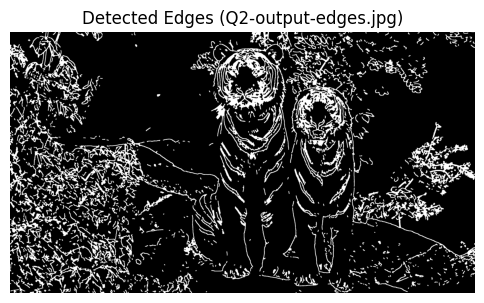

In [111]:
# TODO
output_dir_q2 = 'Images/outputs/Q2'
os.makedirs(output_dir_q2, exist_ok=True)
input_img_q2_path = 'Images/Q2-input.jpg' 

input_img_q2 = cv2.imread(input_img_q2_path)

if input_img_q2 is not None:
    print("Q2-input.jpg loaded. Detecting edges...")
    edges_q2 = edge_detection(input_img_q2)
    if edges_q2 is not None:
        # output_edge_path = os.path.join(output_dir_q2, 'Q2-output-edges.jpg')
        output_edge_path = os.path.join(output_dir_q2, 'Q2-output-edges-110-120.jpg')
        try:
            cv2.imwrite(output_edge_path, edges_q2)
            print(f"Edge map saved to {output_edge_path}")

            plt.figure(figsize=(6, 6))
            plt.imshow(edges_q2, cmap='gray')
            plt.title('Detected Edges (Q2-output-edges.jpg)')
            plt.axis('off')
            plt.show()
        except Exception as e:
            print(f"Error saving edge map: {e}")
    else:
        print("Edge detection failed.")
else:
    # the imgae is none so we had trouble loading it
    print(f"Error: Could not load image at {input_img_q2_path}")

### Step 2: Bilateral Filter

Implement Bilateral filter. This function should be implemented from scratch and you are not allowed to use any existing function or library other than `numpy`.

In [112]:
def bilateral_filter(img: np.ndarray, d: int, sigma_space: float, sigma_color: float):
    #TODO 
    img_float = img.astype(np.float64)
    rows, cols, channels = img_float.shape
    output_img = np.zeros_like(img_float)

    pad_width = d // 2
    padded_img = np.pad(img_float, ((pad_width, pad_width), (pad_width, pad_width), (0, 0)), mode='reflect')

    x, y = np.meshgrid(np.arange(-pad_width, pad_width + 1), np.arange(-pad_width, pad_width + 1))
    spatial_sq_dist = x**2 + y**2
    spatial_weights = np.exp(-spatial_sq_dist / (2 * sigma_space**2))

    for r in range(rows):
        for c in range(cols):
            neighborhood = padded_img[r : r + d, c : c + d, :]
            center_pixel_val = padded_img[r + pad_width, c + pad_width, :]
            center_val_reshaped = center_pixel_val.reshape(1, 1, channels)
            
            color_diff_sq = (neighborhood - center_val_reshaped)**2
            color_weights = np.exp(-color_diff_sq / (2 * sigma_color**2))
            spatial_weights_expanded = spatial_weights[:, :, np.newaxis]
            
            combined_weights = spatial_weights_expanded * color_weights
            numerator = np.sum(combined_weights * neighborhood, axis=(0, 1))
            denominator = np.sum(combined_weights, axis=(0, 1))

            for ch in range(channels):
                if denominator[ch] > 1e-6:
                    output_img[r, c, ch] = numerator[ch] / denominator[ch]
                else:
                    output_img[r, c, ch] = img_float[r, c, ch]

    output_img_final = np.clip(output_img, 0, 255).astype(img.dtype)
    return output_img_final

Apply this function on `Q2-input.jpg` and save the result as `Q2-output-bf.jpg`. Use parameters by your choice to get a proper result (blurring should be noticable, but not too much) Your score on this part depends on the quality of the result.

Applying Bilateral Filter...
hereee
hereee222222


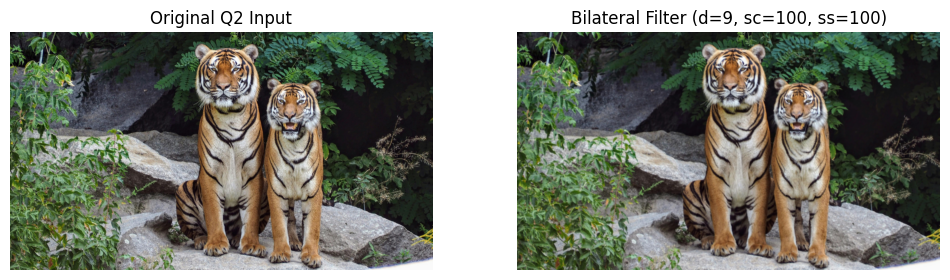

In [113]:
# TODO
# we will use uploaded image in upper cells

if input_img_q2 is not None:
    print("Applying Bilateral Filter...")

    diameter = 9     
    sigma_color = 100  # Larger -> more distant colors will be averaged -> less detail 
    sigma_space = 100  # Larger -> pixels farther away influence the result -> more blurring

    print("hereee")
    bf_img_q2 = bilateral_filter(input_img_q2, diameter, sigma_space, sigma_color)
    print("hereee222222")

    if bf_img_q2 is not None:
        # output_bf_path = os.path.join(output_dir_q2, 'Q2-output-bf.jpg')
        output_bf_filename = f"Q2-output-bf-d{diameter}_sc{sigma_color}_ss{sigma_space}.jpg"
        output_bf_path = os.path.join(output_dir_q2, output_bf_filename)

        try:
            cv2.imwrite(output_bf_path, bf_img_q2)

            plt.figure(figsize=(12, 6))
            plt.subplot(1, 2, 1)
            plt.imshow(cv2.cvtColor(input_img_q2, cv2.COLOR_BGR2RGB))
            plt.title('Original Q2 Input')
            plt.axis('off')
            plt.subplot(1, 2, 2)
            plt.imshow(cv2.cvtColor(bf_img_q2, cv2.COLOR_BGR2RGB))
            plt.title(f'Bilateral Filter (d={diameter}, sc={sigma_color}, ss={sigma_space})')
            plt.axis('off')
            plt.show()
        except Exception as e:
            print(f"Error saving bilateral filtered image: {e}")
    else:
        print("Bilateral filtering failed.")

### Step 3: Image Cartoonization

Use the previous functions to implement `cartoonize` function. This function takes a colored image `img` and a real number $\alpha$ as input. $\alpha$ will be a real number between 0 and 1, indicating the intensity of cartoonization. $\alpha=0$ means minimal cartoonization; output should be the original image (or very close to it) and as $\alpha$ approaches to 1, cartoonization should be more intense. Note that the dimensionality of the result should be the same as the input. Your score on this part depends on the quality of the result.

In [114]:
def cartoonize(img: np.ndarray, alpha: float):
    img_edge = edge_detection(img)
    if img_edge is None:
        print("Error during edge detection in cartoonize.")
        return None

    d_bf = 7
    sigma_color_bf = 50
    sigma_space_bf = 50

    img_bf = bilateral_filter(img, d_bf, sigma_space_bf, sigma_color_bf)
    if img_bf is None:
        print("Error during bilateral filtering in cartoonize.")
        return None

    cartoon_base = img_bf.copy()
    edge_mask_bool = (img_edge == 255)
    cartoon_base[edge_mask_bool] = 0

    img_float = img.astype(np.float64)
    cartoon_base_float = cartoon_base.astype(np.float64)

    blended_img_float = (1.0 - alpha) * img_float + alpha * cartoon_base_float
    output_img = np.clip(blended_img_float, 0, 255).astype(img.dtype)

    return output_img

Apply the method on `Q2-input.jpg` for $\alpha=0, 0.25, 0.5, 1$ and save the results as `Q2-output-0.jpg`, `Q2-output-1.jpg`,`Q2-output-2.jpg` and `Q2-output-3.jpg`, respectively.

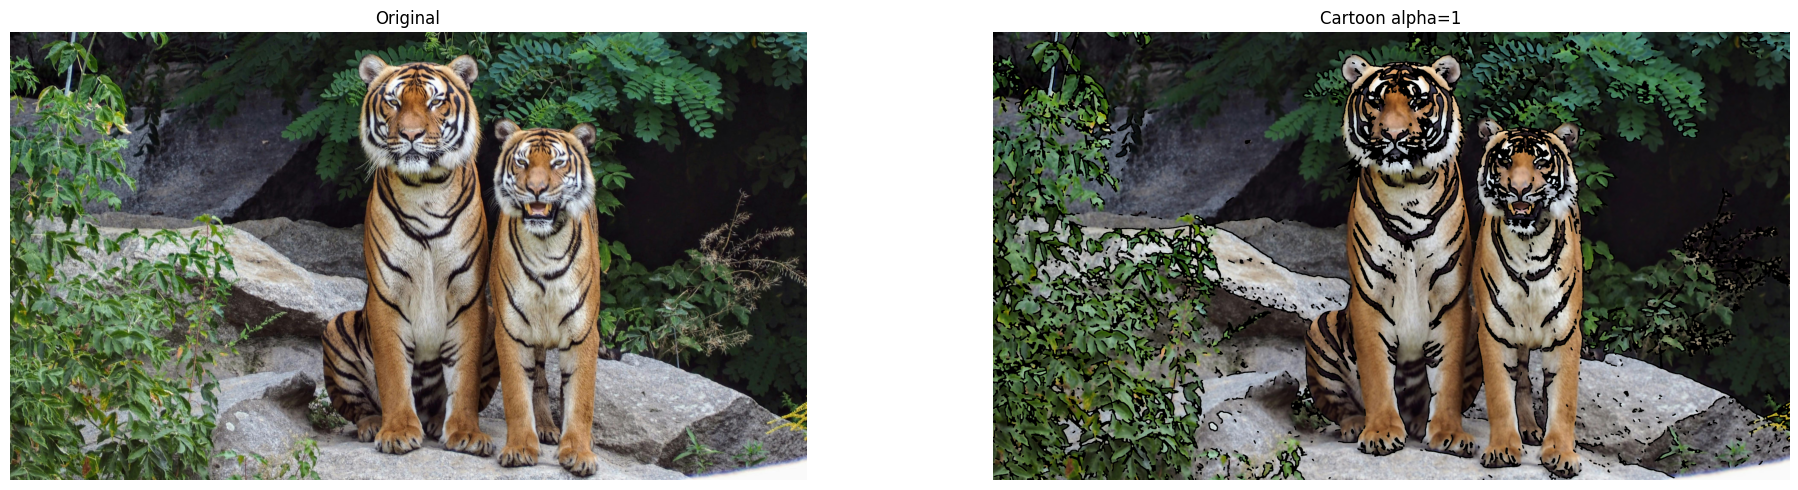

In [115]:
# TODO

if input_img_q2 is not None:
    # alphas = [0, 0.25, 0.5, 1]
    alphas = [1]
    output_filenames = ['Q2-7-output-0.jpg', 'Q2-3-output-1.jpg', 'Q2-3-output-2.jpg', 'Q2-3-output-3.jpg']

    plt.figure(figsize=(20, 5)) # Adjust size as needed
    plt.subplot(1, len(alphas) + 1, 1)
    plt.imshow(cv2.cvtColor(input_img_q2, cv2.COLOR_BGR2RGB))
    plt.title('Original')
    plt.axis('off')

    for i, alpha_val in enumerate(alphas):
        cartoon_img = cartoonize(input_img_q2, alpha_val)

        if cartoon_img is not None:
            output_cartoon_path = os.path.join(output_dir_q2, output_filenames[i])
            try:
                cv2.imwrite(output_cartoon_path, cartoon_img)

                plt.subplot(1, len(alphas) + 1, i + 2) # Start from 2nd subplot position
                plt.imshow(cv2.cvtColor(cartoon_img, cv2.COLOR_BGR2RGB))
                plt.title(f'Cartoon alpha={alpha_val}')
                plt.axis('off')

            except Exception as e:
                print(f"    Error saving cartoonized image: {e}")
        else:
            print(f"    Cartoonization failed for alpha = {alpha_val}")

    plt.tight_layout()
    plt.show()

else:
    print(f"Cannot run cartoonization steps because {input_img_q2_path} could not be loaded.")

In [ ]:
# def edge_detection(img: np.ndarray):
#     # stronger blur 
#     img_blur = cv2.GaussianBlur(img, (9, 9), 0)
#     gray_blur = cv2.cvtColor(img_blur, cv2.COLOR_BGR2GRAY)
#     gray_blur = cv2.medianBlur(gray_blur, 5)

#     low_threshold = 90
#     high_threshold = 120
#     img_edge = cv2.Canny(gray_blur, low_threshold, high_threshold)

#     # Dilate
#     kernel = np.ones((3, 3), np.uint8)
#     img_edge = cv2.dilate(img_edge, kernel, iterations=2)

#     # cleaning lines
#     img_edge = cv2.morphologyEx(img_edge, cv2.MORPH_CLOSE, kernel, iterations=2)
#     _, img_edge = cv2.threshold(img_edge, 127, 255, cv2.THRESH_BINARY)

#     return img_edge

# def bilateral_filter(img: np.ndarray, d: int, sigma_space: float, sigma_color: float):
#     img_float = img.astype(np.float64)
#     rows, cols, channels = img_float.shape
#     output_img = np.zeros_like(img_float)

#     pad_width = d // 2
#     padded_img = np.pad(img_float, ((pad_width, pad_width), (pad_width, pad_width), (0, 0)), mode='reflect')

#     x, y = np.meshgrid(np.arange(-pad_width, pad_width + 1), np.arange(-pad_width, pad_width + 1))
#     spatial_sq_dist = x**2 + y**2
#     spatial_weights = np.exp(-spatial_sq_dist / (2 * sigma_space**2))

#     for r in range(rows):
#         for c in range(cols):
#             neighborhood = padded_img[r : r + d, c : c + d, :]
#             center_pixel_val = padded_img[r + pad_width, c + pad_width, :]
#             center_val_reshaped = center_pixel_val.reshape(1, 1, channels)
            
#             color_diff_sq = (neighborhood - center_val_reshaped)**2
#             color_weights = np.exp(-color_diff_sq / (2 * sigma_color**2))
#             spatial_weights_expanded = spatial_weights[:, :, np.newaxis]
            
#             combined_weights = spatial_weights_expanded * color_weights
#             numerator = np.sum(combined_weights * neighborhood, axis=(0, 1))
#             denominator = np.sum(combined_weights, axis=(0, 1))

#             for ch in range(channels):
#                 if denominator[ch] > 1e-6:
#                     output_img[r, c, ch] = numerator[ch] / denominator[ch]
#                 else:
#                     output_img[r, c, ch] = img_float[r, c, ch]

#     output_img_final = np.clip(output_img, 0, 255).astype(img.dtype)
#     return output_img_final

# def cartoonize(img: np.ndarray, alpha: float):
#     img_edge = edge_detection(img)
#     if img_edge is None:
#         print("Error during edge detection in cartoonize.")
#         return None

#     d_bf = 9
#     sigma_color_bf = 150
#     sigma_space_bf = 150

#     img_bf = bilateral_filter(img, d_bf, sigma_space_bf, sigma_color_bf)
#     if img_bf is None:
#         print("Error during bilateral filtering in cartoonize.")
#         return None


#     cartoon_base = img_bf.copy()
#     edge_mask_bool = (img_edge == 255)
#     cartoon_base[edge_mask_bool] = 0  # Black edges

#     img_float = img.astype(np.float64)
#     cartoon_base_float = cartoon_base.astype(np.float64)

#     blended_img_float = (1.0 - alpha) * img_float + alpha * cartoon_base_float
#     output_img = np.clip(blended_img_float, 0, 255).astype(img.dtype)

#     return output_img

# if input_img_q2 is not None:
#     alphas = [1]
#     output_filenames = ['Q2-tigerrrrrr-output.jpg']

#     plt.figure(figsize=(10, 5))
#     plt.subplot(1, 2, 1)
#     plt.imshow(cv2.cvtColor(input_img_q2, cv2.COLOR_BGR2RGB))
#     plt.title('Original')
#     plt.axis('off')

#     for i, alpha_val in enumerate(alphas):
#         cartoon_img = cartoonize(input_img_q2, alpha_val)
#         if cartoon_img is not None:
#             output_cartoon_path = os.path.join(output_dir_q2, output_filenames[i])
#             cv2.imwrite(output_cartoon_path, cartoon_img)

#             plt.subplot(1, 2, 2)
#             plt.imshow(cv2.cvtColor(cartoon_img, cv2.COLOR_BGR2RGB))
#             plt.title(f'Cartoon alpha={alpha_val}')
#             plt.axis('off')

#     plt.tight_layout()
#     plt.show()
# else:
#     print(f"Cannot run cartoonization steps because {input_img_q2_path} could not be loaded.")